In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
taxi_jan_24 = pd.read_parquet('data\yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_24])

In [3]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [5]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime',
                       'passenger_count','trip_distance','RatecodeID','PULocationID',
                       'DOLocationID','payment_type','total_amount']]

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

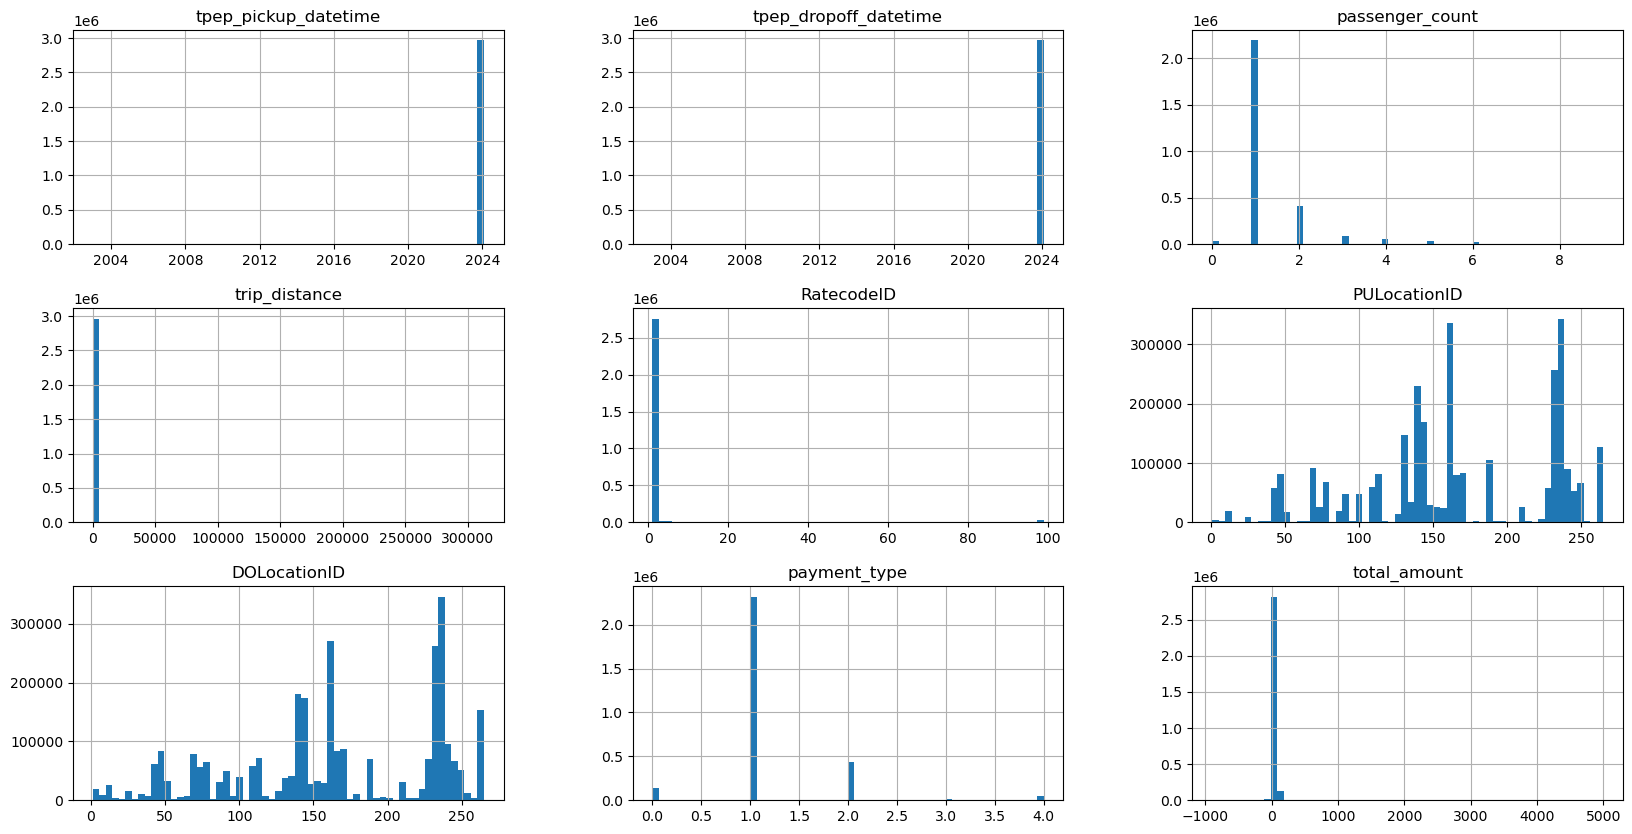

In [7]:
taxi_data.hist(figsize=(20,10),bins = 60)

#here we need to check for the RateCodeId

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

a lot of negative data exists here

<Axes: xlabel='index', ylabel='total_amount'>

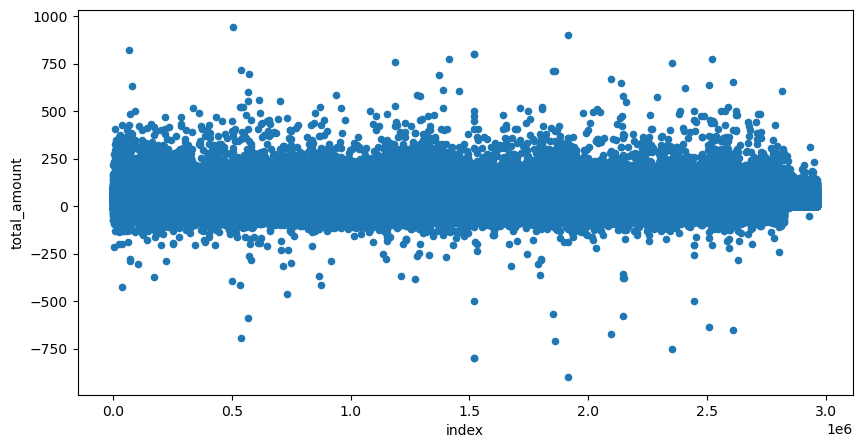

In [9]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind = 'scatter', y = 'total_amount',x='index',figsize=(10,5))

In [10]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(35504, 9)


In [11]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [12]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [13]:
taxi_data[taxi_data['total_amount']>0]['payment_type'].value_counts()

payment_type
1    2318888
2     430800
0     140149
4      25094
3      13773
Name: count, dtype: int64

an insignificant amount of negative values exist we can ignore the data for study purpose

In [14]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

In [15]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(416, 9)


In [16]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(35504, 9)


In [17]:
print(taxi_data[taxi_data['total_amount']>0].shape)

(2928704, 9)


<Axes: >

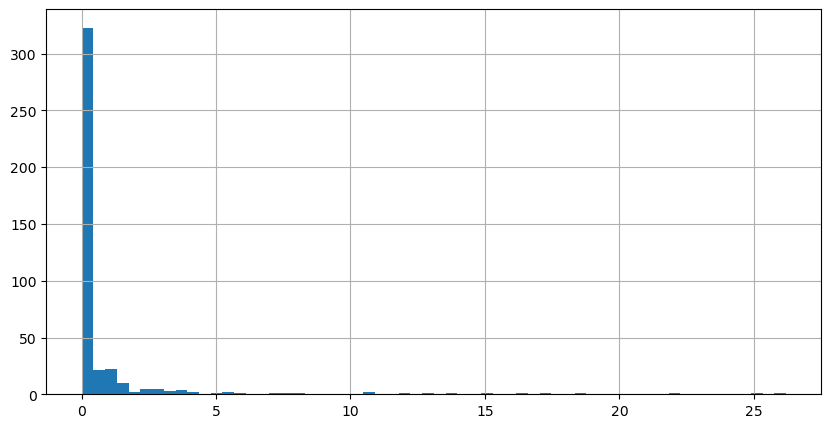

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60,figsize=(10,5))

<Axes: >

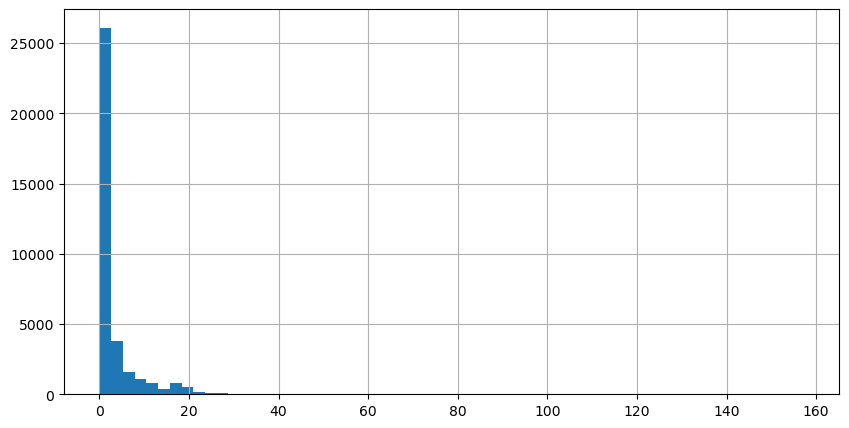

In [19]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

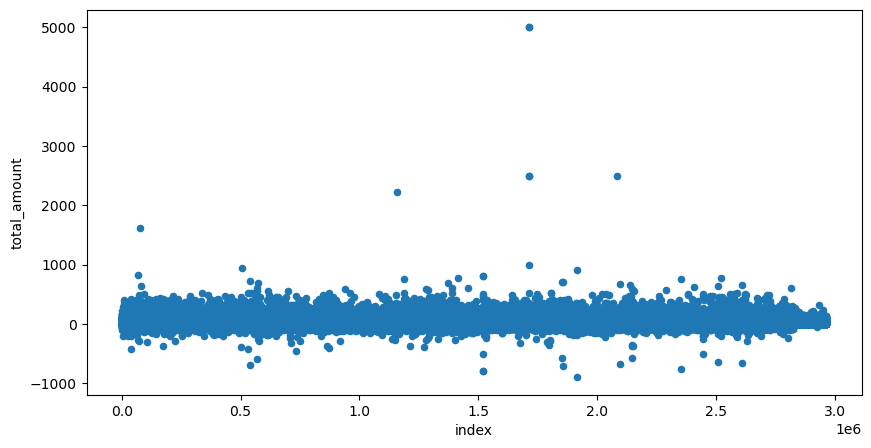

In [20]:
taxi_data.reset_index().plot(kind='scatter',y = 'total_amount',x='index',figsize=(10,5))

In [21]:
taxi_data[taxi_data['total_amount']>1000].shape

(7, 9)

In [22]:
taxi_data[taxi_data['total_amount']<1000].shape

(2964616, 9)

In [23]:
taxi_data[taxi_data['total_amount']>500].shape

(62, 9)

In [24]:
taxi_data[taxi_data['total_amount']>400].shape

(179, 9)

In [25]:
taxi_data[taxi_data['total_amount']>300].shape

(525, 9)

In [26]:
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [27]:
taxi_data['total_amount'].mean()


26.801504770925415

#filtering the data

In [28]:
taxidatafilter = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<300)]

In [29]:
taxidatafilter.shape

(2928593, 9)

In [30]:
taxidatafilter.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140159
trip_distance                 0
RatecodeID               140159
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

we will ignore this for now and will modify further if needed....

In [31]:
taxiDataPrepare = taxidatafilter.copy()

In [32]:
taxiDataPrepare.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [33]:
taxiDataPrepare.loc[:,'RatecodeID'] = taxiDataPrepare['RatecodeID'].astype(str)
taxiDataPrepare.loc[:,'PULocationID'] = taxiDataPrepare['PULocationID'].astype(str)
taxiDataPrepare.loc[:,'DOLocationID'] = taxiDataPrepare['DOLocationID'].astype(str)
taxiDataPrepare.loc[:,'payment_type'] = taxiDataPrepare['payment_type'].astype(str)

In [34]:
taxiDataPrepare.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [35]:
taxiDataPrepare.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [36]:
taxiDataPrepare['transaction_date'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.date)
taxiDataPrepare['transaction_year'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.year)
taxiDataPrepare['transaction_month'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.month)
taxiDataPrepare['transaction_day'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.day)
taxiDataPrepare['transaction_hour'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.hour)

In [37]:
taxiDataPrepare.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,1970-01-01 00:00:00.000002024,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,1970-01-01 00:00:00.000002024,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,1970-01-01 00:00:00.000002024,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,1970-01-01 00:00:00.000002024,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,1970-01-01 00:00:00.000002024,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01


In [38]:
taxiDataPrepare['transaction_date'] = pd.to_datetime(taxiDataPrepare['tpep_pickup_datetime'].dt.date)
taxiDataPrepare['transaction_year'] = (taxiDataPrepare['tpep_pickup_datetime'].dt.year)
taxiDataPrepare['transaction_month'] = (taxiDataPrepare['tpep_pickup_datetime'].dt.month)
taxiDataPrepare['transaction_day'] = (taxiDataPrepare['tpep_pickup_datetime'].dt.day)
taxiDataPrepare['transaction_hour'] = (taxiDataPrepare['tpep_pickup_datetime'].dt.hour)

In [39]:
taxiDataPrepare.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

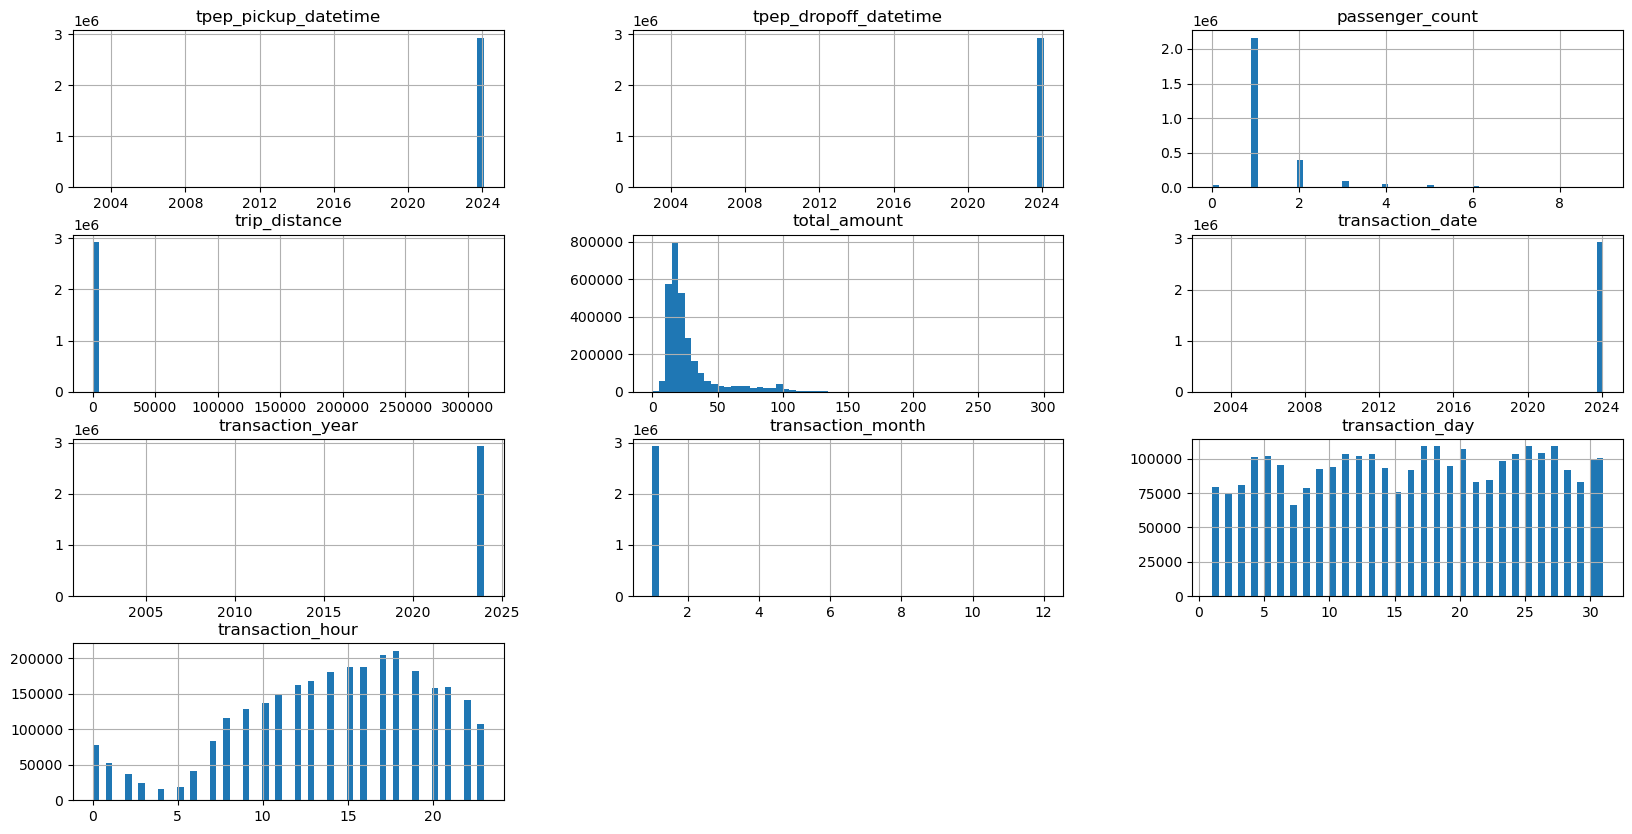

In [40]:
taxiDataPrepare.hist(figsize = (20,10) , bins = 60)

In [41]:
taxiDataPrepare = taxiDataPrepare[taxiDataPrepare['transaction_year']==2024]
taxiDataPrepare = taxiDataPrepare[taxiDataPrepare['transaction_month']==1]

In [42]:
category_col = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
num_col = ['trip_distance','total_amount']
all_req_col = category_col + num_col

In [43]:
mainTaxiDF = taxiDataPrepare[all_req_col]

In [44]:
mainTaxiDF.size

20500032

In [45]:
mainTaxiDF.shape

(2928576, 7)

In [46]:
mainTaxiDF.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


In [47]:
taxi_by_region = mainTaxiDF.groupby(category_col).mean().reset_index()
taxi_by_region['count_of_transactions'] = mainTaxiDF.groupby(category_col).count().reset_index()['total_amount']

In [48]:
taxi_by_region.shape

(77494, 8)

In [49]:
taxi_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [50]:
taxi_by_region.head(10)

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2
5,1,2024-01-01,1,1,16,17.000000,142.800000,1
6,1,2024-01-01,1,1,17,0.015000,100.812500,4
7,1,2024-01-02,1,2,5,0.000000,124.700000,1
8,1,2024-01-02,1,2,6,0.000000,145.200000,1
9,1,2024-01-02,1,2,7,0.000000,84.970000,2


<Axes: >

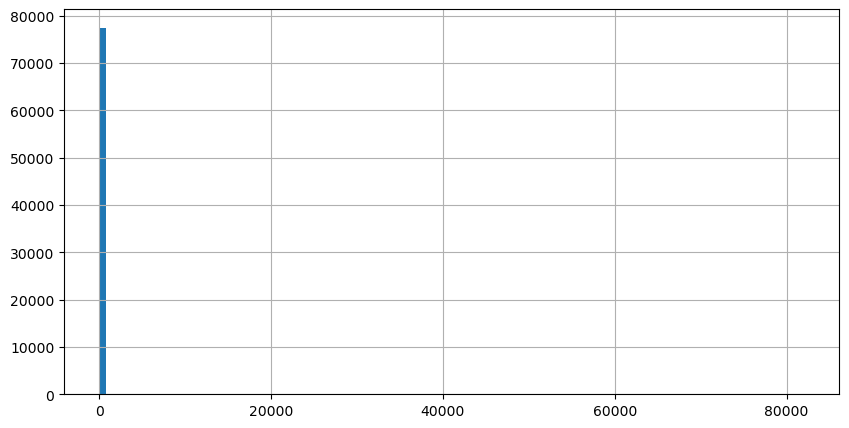

In [51]:
taxi_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<Axes: >

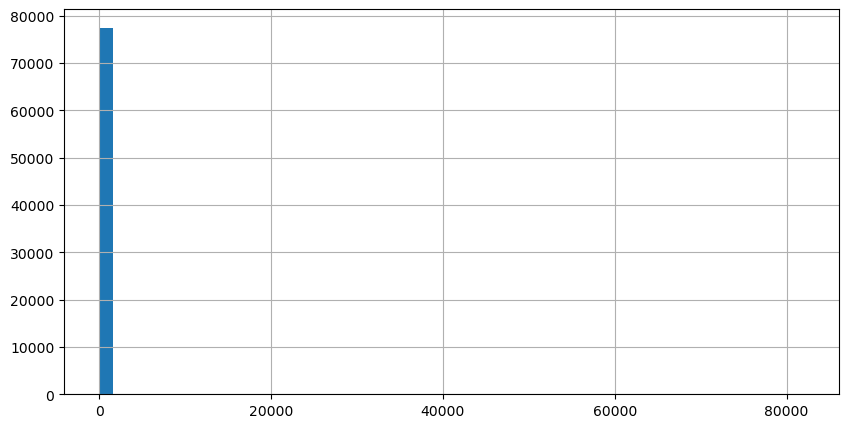

In [52]:
taxi_by_region['trip_distance'].hist(bins=50,figsize=(10,5))

<Axes: >

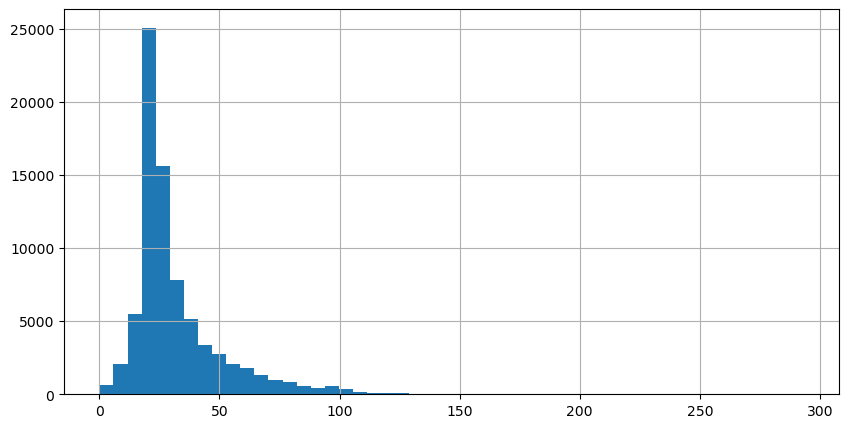

In [53]:
taxi_by_region['total_amount'].hist(bins=50,figsize=(10,5))

#this is all about selecting a benchmark

In [54]:
data_for_model = taxi_by_region.copy()

In [55]:
data_for_model.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
dtype: object

In [56]:
categorical_object = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_feature = categorical_object + ['trip_distance']
target_benchmark = 'total_amount'

In [57]:
from sklearn.model_selection import train_test_split
x_bench = data_for_model[input_feature]
y_bench = data_for_model[target_benchmark]
x_bench = pd.get_dummies(x_bench)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

In [59]:
model_at_hand = tree

In [60]:
y_prod_b = model_at_hand.predict(X_test_b)

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
from math import sqrt

In [63]:
print('mean absolute error', mean_absolute_error(y_test_b,y_prod_b))
print('mean squared error', mean_squared_error(y_test_b,y_prod_b))
print('root mean squared error', sqrt(mean_squared_error(y_test_b,y_prod_b)))
print('r2',r2_score(y_test_b,y_prod_b))

mean absolute error 6.695552462379967
mean squared error 192.69140860607286
root mean squared error 13.88133309902449
r2 0.531703171153264


<Axes: xlabel='true', ylabel='pred'>

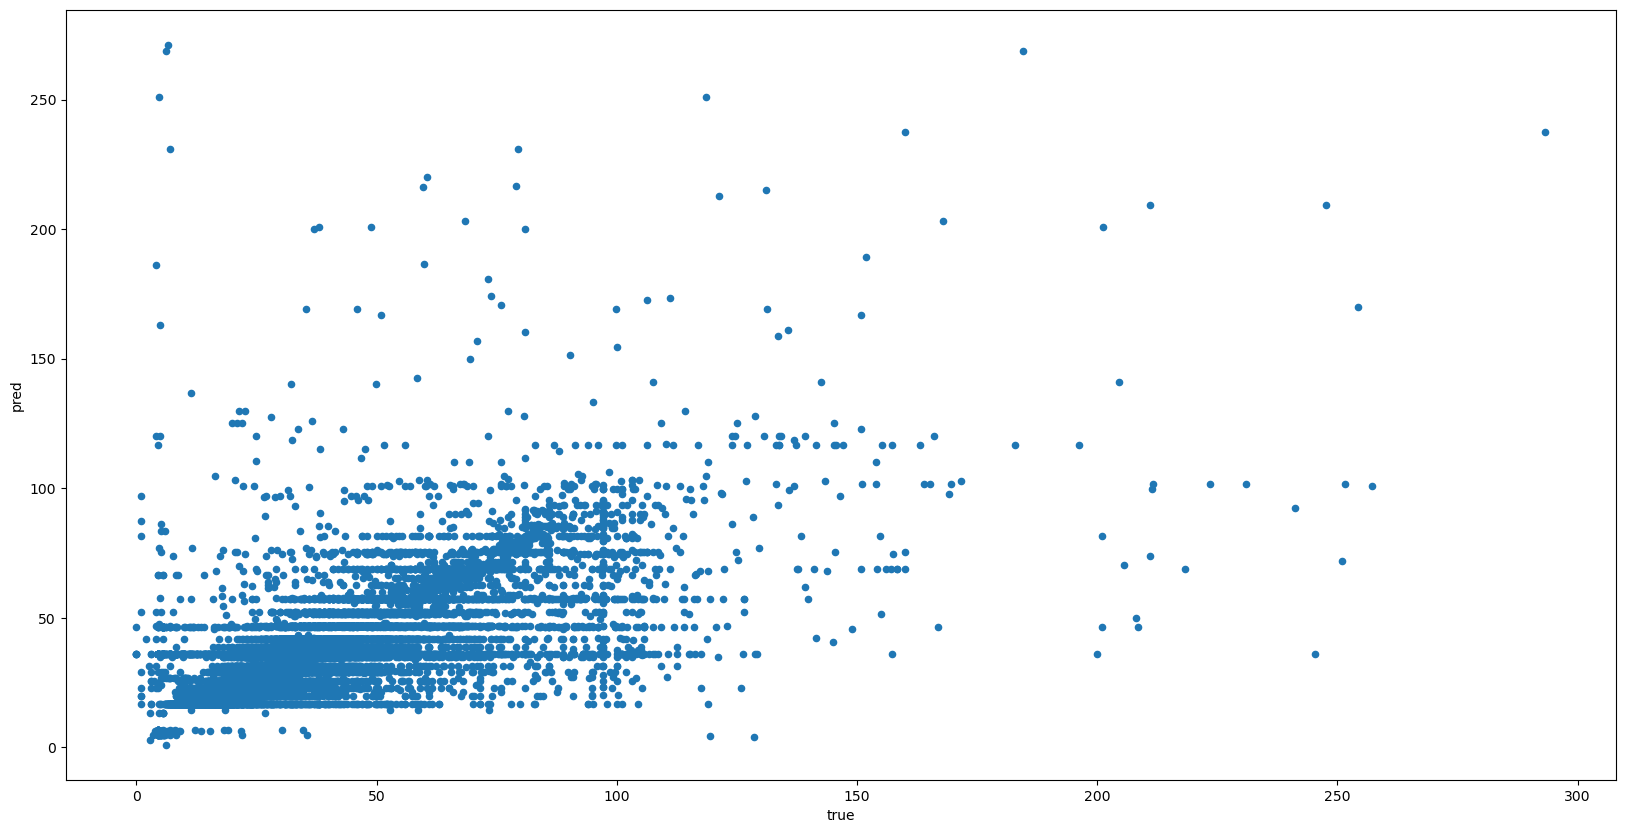

In [64]:
data = {'true': y_test_b, 'pred' : y_prod_b}
results = pd.DataFrame(data)
results.plot(figsize = (20,10),kind = 'scatter',x='true',y='pred')

In [65]:
data_for_model = taxi_by_region.copy()
data_for_model.dtypes
categorical_object = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_feature = categorical_object 
target_benchmark = 'total_amount'
from sklearn.model_selection import train_test_split
x_bench = data_for_model[input_feature]
y_bench = data_for_model[target_benchmark]
x_bench = pd.get_dummies(x_bench)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

mean absolute error 11.765697840172503
mean squared error 330.3591587540046
root mean squared error 18.175784955649224
r2 0.19713002492369514


<Axes: xlabel='true', ylabel='pred'>

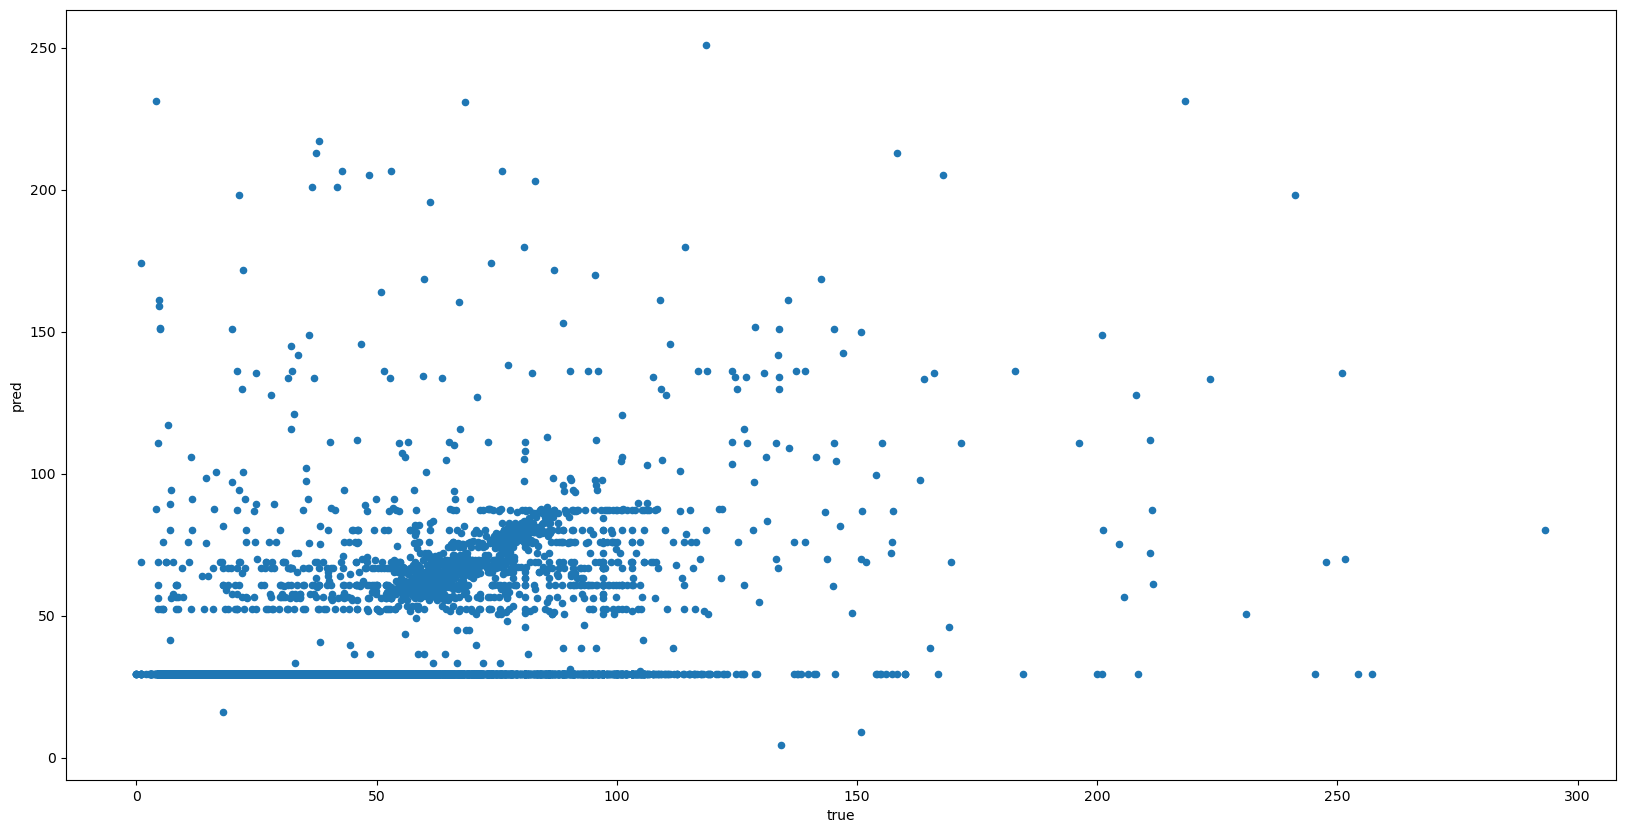

In [66]:
model_at_hand = tree
y_prod_b = model_at_hand.predict(X_test_b)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error', mean_absolute_error(y_test_b,y_prod_b))
print('mean squared error', mean_squared_error(y_test_b,y_prod_b))
print('root mean squared error', sqrt(mean_squared_error(y_test_b,y_prod_b)))
print('r2',r2_score(y_test_b,y_prod_b))
data = {'true': y_test_b, 'pred' : y_prod_b}
results = pd.DataFrame(data)
results.plot(figsize = (20,10),kind = 'scatter',x='true',y='pred')

In [67]:
data_with_new_features =  taxi_by_region.copy()

In [68]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [69]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday

In [71]:
data_with_new_features['weekend'] = data_with_new_features['transaction_date'].apply(lambda x:True if x==5 or x==6 else False)

In [74]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data_with_new_features['transaction_date'].min(), end=data_with_new_features['transaction_date'].max())

data_with_new_features['holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [76]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,holiday
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True


In [77]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [78]:
data_with_new_features = data_with_new_features.merge(zone_lookup,left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,EWR


In [79]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        42075
Queens           15006
Brooklyn         13561
Bronx             5286
Unknown            722
EWR                186
Staten Island       68
Name: count, dtype: int64

ml algo random forest selection

In [80]:
data_for_model = data_with_new_features.copy()

In [84]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'holiday', 'Borough']
input_features = categorical_features
target_feature = 'total_amount'

In [85]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.577505848184071
mean_squared_error 283.01231363641006
root_mean_squared_error 16.82296982213337
r2 0.3121967919625672


<Axes: xlabel='true', ylabel='pred'>

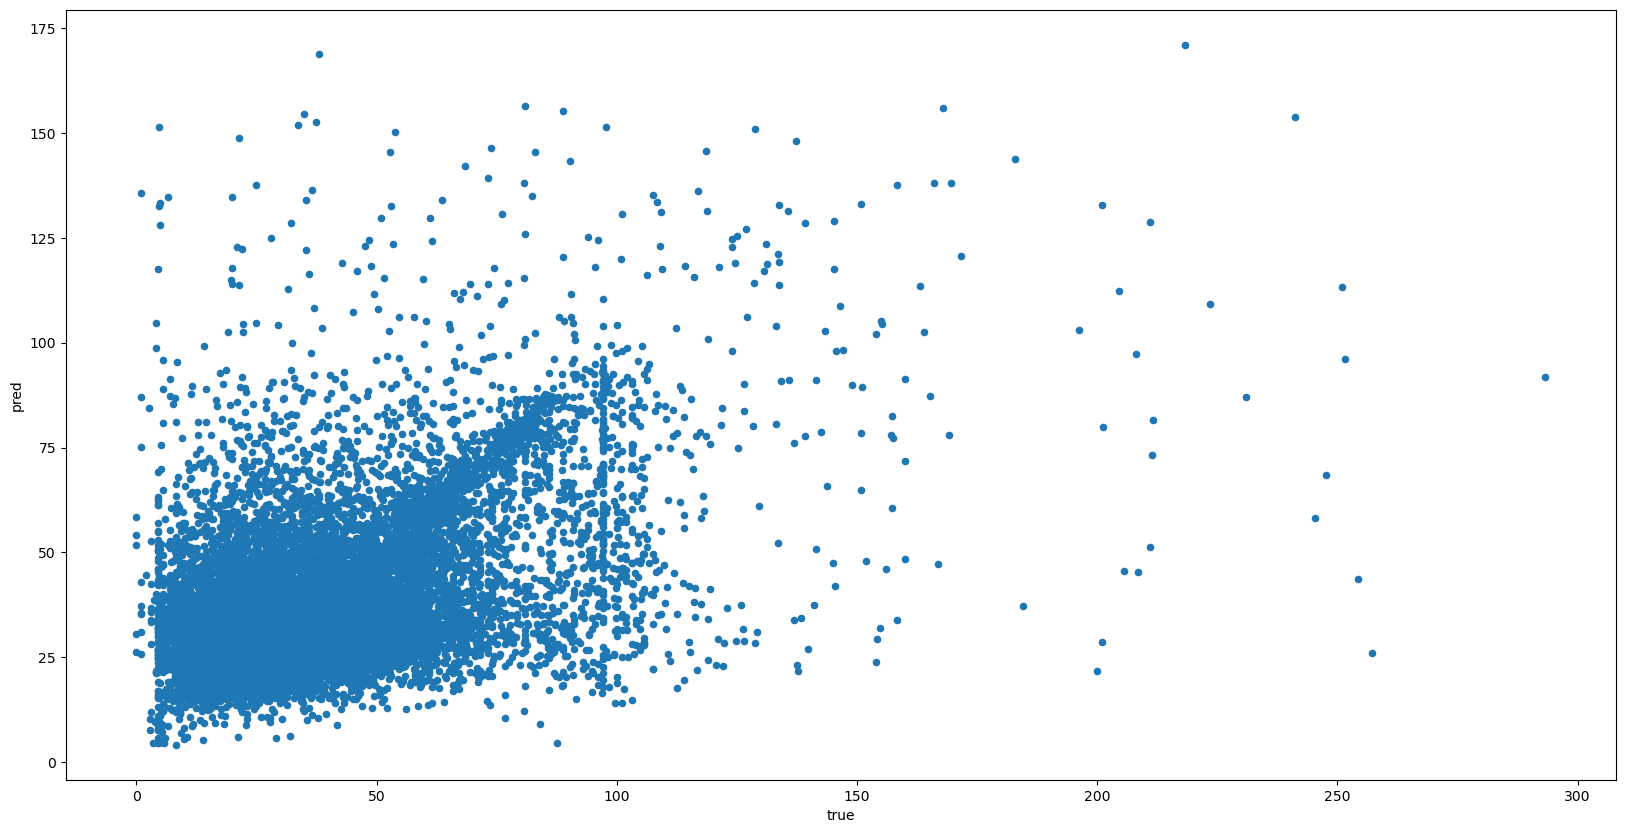

In [88]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)
model_at_hand = gradBooster
y_pred = model_at_hand.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 10.115629013226291
mean_squared_error 263.38964347773737
root_mean_squared_error 16.22928351707916
r2 0.35988565507943737


<Axes: xlabel='true', ylabel='pred'>

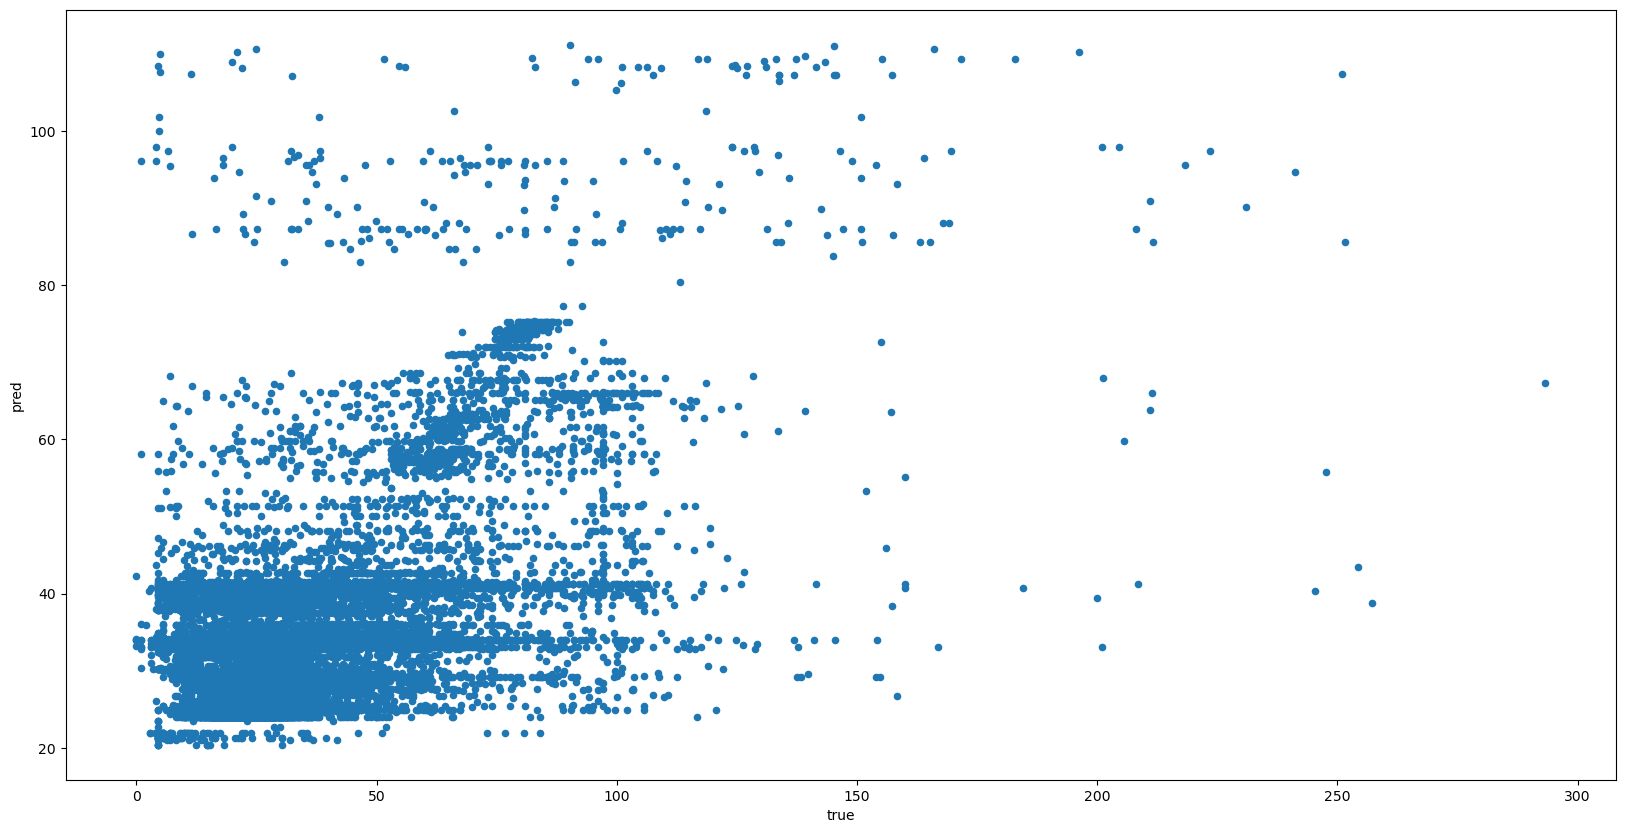

In [90]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')